<a href="https://colab.research.google.com/github/mitacrane/capstone4/blob/main/Capstone_4_DS201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>©Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

## **Intro to Machine Learning Capstone Deliverable**

For this deliverable, you will work on two parts, which contain the following sections:

**Part 1: Regression**
- 1.1 Generate a synthetic dataset.
- 1.2 Split and scale the data.
- 1.3 Build linear regression models using polynomial features of increasing degree to observe underfitting versus overfitting.
- 1.4 Apply Ridge regularization to see its effect on an overfitting model.

**Part 2: Classification**
- 2.1 Load an image dataset for classification.
- 2.2 Split and scale the data.
- 2.3 Train a "*simple*" feedforward Neural Network.
- 2.4 Train a "*deeper*" feedforward Neural Network.
- 2.5 Show the performance of our models on two different datasets.


## **Video Instructions:**

For your video, imagine you are creating a tutorial to explain the basics of Machine Learning to others. Your video will show you going over your completed notebook and explaining all of its parts (no need to explain the code, just what is being done). You are encouraged to use GenAI to help you better understand the concepts. However, avoid using GenAI to create a script and simply read from it; try to learn the concepts and use your own words! Record a video explaining:

1. Why data splitting and scaling are necessary.
2. The difference between underfitting and overfitting, and how you can detect these issues.
3. How increasing the polynomial degree (i.e., model complexity) impacts model performance (underfitting vs. overfitting).
4. How Ridge regularization helps reduce overfitting.
5. Why there is a performance difference between a "simple" neural network and a "deeper" neural network.
6. Why there is a performance difference when using the same models on a more complex image dataset.

You do not need to type your answers in the notebook—explain these concepts in your video using the plots, performance metrics, and any outputs from the code chunks in your notebook to support your explanations.


## **Coding Instructions:**

You are allowed to use GenAI to complete the code chunks (Google Colab has Copilot integrated). There will be some code chunks that need to be completed, so make sure to read the instructions carefully since your code needs to follow them (e.g., how to name things, etc.). Only modify/type your code within the comments:

`### START CODE HERE ###`

`### END CODE HERE ###`

Modifying any other code or not following the instructions/comments may potentially create errors in other areas.


### Setup

Before starting anything, we need to make sure to import all the necessary libraries we will use in this notebook


In [4]:
# Provided code: Import necessary libraries for regression and classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


# For classification using Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical


## Part 1: Regression

In this section, we will:
- 1.1 Generate a synthetic dataset.
- 1.2 Split and scale the data.
- 1.3 Train polynomial regression models with degrees 1, 5, and 20.
- 1.4 Apply Ridge regularization to see its effect on an overfitting model.


###1.1 Generate a synthetic dataset.

In [5]:
#Generate synthetic regression data
np.random.seed(42)  # for reproducibility
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + np.random.randn(100, 1) * 3

print('Synthetic regression data generated.')

Synthetic regression data generated.


Now that we have generated our synthetic data, let's look at it and see some summary statistics.


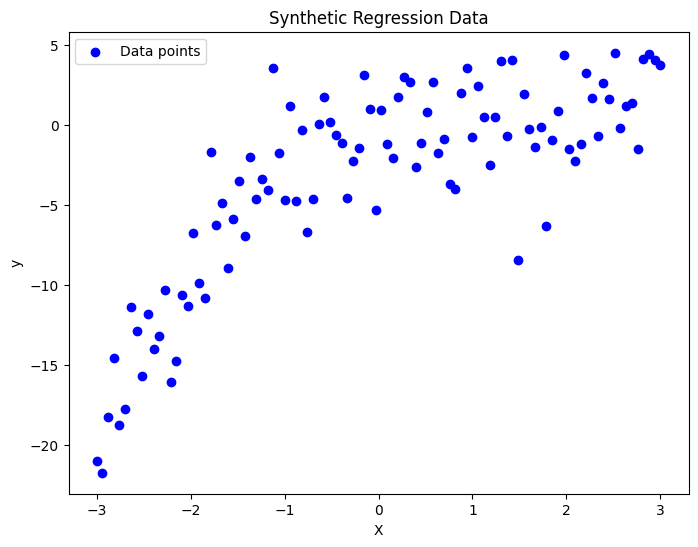

In [6]:
# Plot the synthetic regression data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.title('Synthetic Regression Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
# Combine X and y into a single DataFrame
df = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])
# Display summary statistics using the describe() method
print(df.describe())

                  X           y
count  1.000000e+02  100.000000
mean   1.065814e-16   -3.372146
std    1.758272e+00    6.373681
min   -3.000000e+00  -21.753065
25%   -1.500000e+00   -6.253508
50%    0.000000e+00   -1.462019
75%    1.500000e+00    1.185141
max    3.000000e+00    4.535356


### 1.2 Split and scale the data.

#### 1.2.1 Split data

Here we will just split the data between a training set and a test set. No validation set is needed since no hyperparameter tuning will be performed (even though  we will be doing some model comparisons) . We will use an 80/20 partition.


In [8]:
# Split and scale the regression data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Remember to explain why do we need to split out data**


You could also talk about other ways to splitting the data, and/or why 80/20, best practices, etc


#### 1.2.1 Scale data

In [14]:
# These are your defined scaler objects
scaler_X = StandardScaler()
scaler_y = StandardScaler()

### START CODE HERE ### (≈ 4 lines of code)

# Use scaler_X for your features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Use scaler_y for your target variables - note the lowercase y
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

### END CODE HERE ###


The code below is just to see how your data looks

In [15]:
df_or = pd.DataFrame(X_train, columns=['X_train'])
df_or['y_train'] = y_train
print(df_or.describe())

df_sc = pd.DataFrame(X_train_scaled, columns=['X_train_scaled'])
df_sc['y_train_scaled'] = y_train_scaled
print(df_sc.describe())



         X_train    y_train
count  80.000000  80.000000
mean    0.075758  -3.132195
std     1.760668   6.215460
min    -2.939394 -21.753065
25%    -1.439394  -6.253508
50%     0.121212  -1.297410
75%     1.500000   1.260989
max     3.000000   4.535356
       X_train_scaled  y_train_scaled
count    8.000000e+01    8.000000e+01
mean     2.775558e-17    2.220446e-17
std      1.006309e+00    1.006309e+00
min     -1.723309e+00   -3.014798e+00
25%     -8.659843e-01   -5.053538e-01
50%      2.597953e-02    2.970594e-01
75%      8.140252e-01    7.112751e-01
max      1.671350e+00    1.241409e+00


**Expected output:**

The numbers above should look something like:
```
 X_train    y_train
count  80.000000  80.000000
mean    0.075758  -3.132195
std     1.760668   6.215460
min    -2.939394 -21.753065
25%    -1.439394  -6.253508
50%     0.121212  -1.297410
75%     1.500000   1.260989
max     3.000000   4.535356
       X_train_scaled  y_train_scaled
count    8.000000e+01    8.000000e+01
mean     2.775558e-17   -1.387779e-17
std      1.006309e+00    1.006309e+00
min     -1.723309e+00   -3.014798e+00
25%     -8.659843e-01   -5.053538e-01
50%      2.597953e-02    2.970594e-01
75%      8.140252e-01    7.112751e-01
max      1.671350e+00    1.241409e+00
```



#### **Remember to explain why do we need to scale our data?**


 When we have multiple features, scaling becomes potentially more important. Scaling you target varialbe is not as critical, but a good practice. Also, try to explain why type of scaling was performed (i.e., look at the `std` of the `X_train_scaled` vs `X_train`.  Also, why do we use  `scaler_X.fit_transform(....)` for the `X_train_scaled`, but for the `X_test_scaled` we used `scaler_X.transform(...)`


### 1.3 Train polynomial regression models with degrees 1, 5, and 20.

After training each model, the performance (R² score) is computed on both the training and test sets to observe the effect of model complexity.


#### Polynomial regression models with degrees=1

Your task is to build a linear model using degree 1 polynomial features (which is just your original data with an intercept). Follow these steps:

1. Create a `PolynomialFeatures` object with `degree=1`.
2. Use `fit_transform()` on your scaled training data.
3. Initialize and fit a `LinearRegression` model using the transformed features and `y_train_scaled`.


In [38]:
### START CODE HERE ### (≈ 4 lines of code)
# Create a polynomial features transformer (degree 2 is commonly used, but you can adjust)
poly1 = PolynomialFeatures(degree=2, include_bias=False)

# Transform the training data
X_train_poly1 = poly1.fit_transform(X_train_scaled)

# Create a regression model (LinearRegression is commonly used with polynomial features)
model1 = LinearRegression()

# Fit the model on the polynomial-transformed data
model1.fit(X_train_poly1, y_train_scaled)
### END CODE HERE ###

LinearRegression()

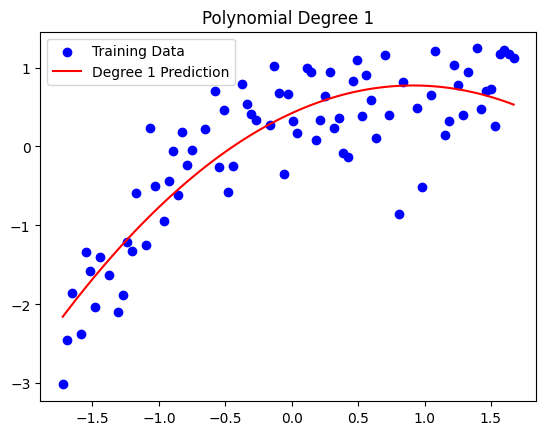

In [39]:
# Provided code: Plot predictions for polynomial degree 1
X_plot = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
X_plot_poly1 = poly1.transform(X_plot)
y_plot1 = model1.predict(X_plot_poly1)

plt.figure()
plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Training Data')
plt.plot(X_plot, y_plot1, color='red', label='Degree 1 Prediction')
plt.title('Polynomial Degree 1')
plt.legend()
plt.show()

In [40]:
# Provided performance evaluation for polynomial degree 1
train_score_deg1 = model1.score(X_train_poly1, y_train_scaled)
test_score_deg1 = model1.score(poly1.transform(X_test_scaled), y_test_scaled)
print('Degree 1 - Training R²:', train_score_deg1, ' | Test R²:', test_score_deg1)

Degree 1 - Training R²: 0.7534970098669328  | Test R²: 0.8143205848941786


**Expected output:**
```
Degree 1 - Training R²: 0.6065406392361405  | Test R²: 0.595089539490184

```



#### Polynomial regression models with degrees=5

Your task is to build a linear model using degree 5 polynomial features. Follow these steps:

1. Create a `PolynomialFeatures` object with `degree=5` and use `fit_transform()` on your already scaled training data.

2. Create a new `StandardScaler` and use it to scale the polynomial features (even though we are using the already scaled data, when increasing the degree of the polynomial, the range of the new features might be very different, so we scale them again).

3. Initialize a `LinearRegression` model and fit it on the scaled polynomial features and the scaled target.


In [41]:
### START CODE HERE ### (≈ 6 lines of code)
# Train model with polynomial degree 5
poly5 = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly5 = poly5.fit_transform(X_train_scaled)

# Scale the polynomial features
scaler_poly5 = StandardScaler()
X_train_poly5_scaled = scaler_poly5.fit_transform(X_train_poly5)

model5 = LinearRegression()
model5.fit(X_train_poly5_scaled, y_train_scaled)
### END CODE HERE ###

LinearRegression()

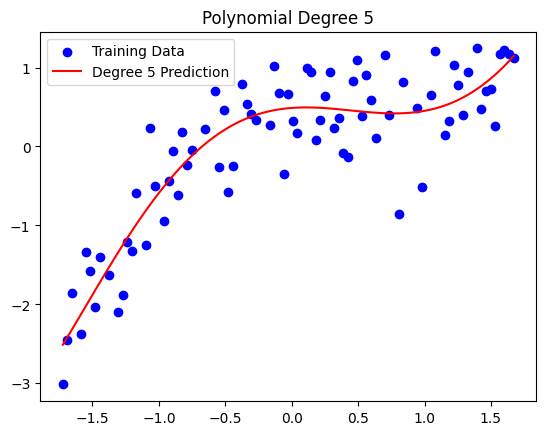

In [42]:
# Provided code: Plot predictions for polynomial degree 5
X_plot_poly5 = poly5.transform(X_plot)
X_plot_poly5_scaled = scaler_poly5.transform(X_plot_poly5)  # Scale the polynomial features for the plot
y_plot5 = model5.predict(X_plot_poly5_scaled)

plt.figure()
plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Training Data')
plt.plot(X_plot, y_plot5, color='red', label='Degree 5 Prediction')
plt.title('Polynomial Degree 5')
plt.legend()
plt.show()


In [43]:
# Provided performance evaluation for polynomial degree 5
# Use the already scaled polynomial features for the training set
train_score_deg5 = model5.score(X_train_poly5_scaled, y_train_scaled)
# Transform and then scale the test data using the same poly5 and scaler_poly5
X_test_poly5 = poly5.transform(X_test_scaled)
X_test_poly5_scaled = scaler_poly5.transform(X_test_poly5)
test_score_deg5 = model5.score(X_test_poly5_scaled, y_test_scaled)
print('Degree 5 - Training R²:', train_score_deg5, ' | Test R²:', test_score_deg5)


Degree 5 - Training R²: 0.8119308456491078  | Test R²: 0.8765925052424354


**Expected output:**
```
Degree 5 - Training R²: 0.8119308456491077  | Test R²: 0.8765925052424351
```



#### Polynomial regression models with degrees=20

Your task is to build a linear model using degree 20 polynomial features; however, now we will use a `Pipeline` object to make things a bit easier. Follow these steps:

1. Create a `Pipeline` from scikit-learn.
2. Add the `PolynomialFeatures(degree=20)` to the Pipeline (name this step `'poly'`).
3. Add `StandardScaler()` to the Pipeline (name this step `'scaler'`).
4. Add `LinearRegression()` to the Pipeline (name this step `'lin_reg'`).
5. Use the already scaled training data to fit the entire pipeline.


In [44]:
### START CODE HERE ###

# Create a pipeline for a degree 20 polynomial regression model
pipeline_20 = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

# Fit the pipeline on the already scaled training data and the scaled target
pipeline_20.fit(X_train_scaled, y_train_scaled)
### END CODE HERE ###


Pipeline(steps=[('poly', PolynomialFeatures(degree=20, include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

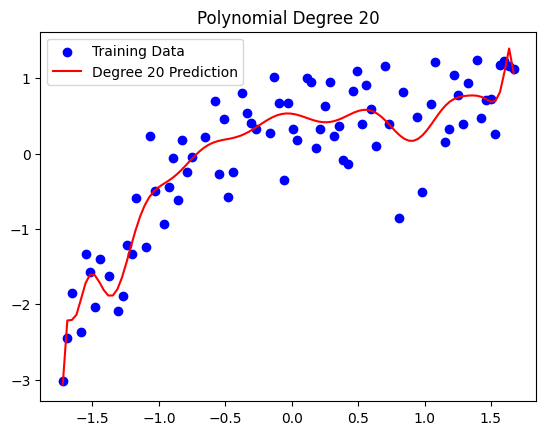

In [45]:
# Provided code: Plot predictions for polynomial degree 20 using the pipeline
# Transform X_plot using the 'poly' and 'scaler' steps from the pipeline
X_plot_poly20 = pipeline_20.named_steps['poly'].transform(X_plot)
X_plot_poly20_scaled = pipeline_20.named_steps['scaler'].transform(X_plot_poly20)
y_plot20 = pipeline_20.named_steps['lin_reg'].predict(X_plot_poly20_scaled)

plt.figure()
plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Training Data')
plt.plot(X_plot, y_plot20, color='red', label='Degree 20 Prediction')
plt.title('Polynomial Degree 20')
plt.legend()
plt.show()


In [46]:
# Provided performance evaluation for polynomial degree 20 using the pipeline
train_score_deg20 = pipeline_20.score(X_train_scaled, y_train_scaled)
test_score_deg20 = pipeline_20.score(X_test_scaled, y_test_scaled)
print('Degree 20 - Training R²:', train_score_deg20, '| Test R²:', test_score_deg20)

Degree 20 - Training R²: 0.8364137307217687 | Test R²: -0.14913407228752673


**Expected output:**
```
Degree 20 - Training R²: 0.836413730721834 | Test R²: -0.14913407267650958
```




#### Summary of Models performance


In [47]:
print('Degree 1 - Training R²:', train_score_deg1, ' | Test R²:', test_score_deg1)
print('Degree 5 - Training R²:', train_score_deg5, ' | Test R²:', test_score_deg5)
print('Degree 20 - Training R²:', train_score_deg20, '| Test R²:', test_score_deg20)

Degree 1 - Training R²: 0.7534970098669328  | Test R²: 0.8143205848941786
Degree 5 - Training R²: 0.8119308456491078  | Test R²: 0.8765925052424354
Degree 20 - Training R²: 0.8364137307217687 | Test R²: -0.14913407228752673


#### **Remember to explain which model is underfitting and which one is overfitting, as well as how you can tell which one is doing what**


 Make sure to use the performance numbers and plots to help your explanations.


### 1.4 Apply Ridge regularization to see its effect on our degree=20 model.

Your task is to build a Ridge regularization linear model using degree 20 polynomial features. We can use a very similar `Pipeline` as the step above:

1. I have created a `Pipeline` from scikit-learn.
2. I have added the `PolynomialFeatures(degree=20)` to the Pipeline.
3. I have added `StandardScaler()` to the Pipeline.
4. **Now you replace `LinearRegression()` with `Ridge(alpha=1.0)` to incorporate L2 regularization (name this step `'ridge_reg'`).**
5. Use the already scaled training data to fit the entire pipeline.


In [32]:
### START CODE HERE ###

# Create a pipeline for a degree 20 polynomial regression model with L2 regularization using Ridge regression
pipeline_20_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1))  # L2 regularization via Ridge regression (adjust alpha as needed)
])

pipeline_20_reg.fit(X_train_scaled, y_train_scaled)
### END CODE HERE ###

Pipeline(steps=[('poly', PolynomialFeatures(degree=20, include_bias=False)),
                ('scaler', StandardScaler()), ('ridge', Ridge(alpha=0.1))])

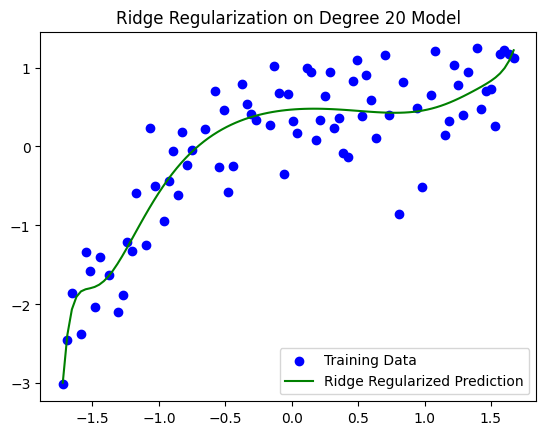

In [33]:
# Provided code: Plot Ridge regularized predictions for degree 20 using the pipeline
y_plot_ridge = pipeline_20_reg.predict(X_plot)

plt.figure()
plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Training Data')
plt.plot(X_plot, y_plot_ridge, color='green', label='Ridge Regularized Prediction')
plt.title('Ridge Regularization on Degree 20 Model')
plt.legend()
plt.show()


In [34]:
# Provided performance evaluation for the Ridge regularized model using the pipeline
train_score_ridge = pipeline_20_reg.score(X_train_scaled, y_train_scaled)
test_score_ridge = pipeline_20_reg.score(X_test_scaled, y_test_scaled)
print('Ridge Model - Training R²:', train_score_ridge, '| Test R²:', test_score_ridge)


Ridge Model - Training R²: 0.8220129697546731 | Test R²: 0.8147169967371093


In [36]:
# Set display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Extract feature names from the polynomial transformation in the Ridge pipeline
feature_names = pipeline_20_reg.named_steps['poly'].get_feature_names_out()

# Extract coefficients from both models
coef_ridge = pipeline_20_reg.named_steps['ridge'].coef_.flatten()
coef_linear = pipeline_20.named_steps['lin_reg'].coef_.flatten()

# Create a DataFrame with coefficients as rows and model names as columns
df_coef = pd.DataFrame({
    'Ridge': coef_ridge,
    'Linear': coef_linear
}, index=feature_names)

print("Theta parameter values (coefficients) for each model:")
print(df_coef)



Theta parameter values (coefficients) for each model:
          Ridge        Linear
x0     0.138141     -0.224581
x0^2  -0.434321     -3.076074
x0^3   0.527957     12.983777
x0^4  -0.137480     54.195634
x0^5   0.613683   -126.508392
x0^6  -0.036752   -374.629037
x0^7   0.079923    657.160540
x0^8   0.068684    846.393624
x0^9  -0.346973  -2098.083532
x0^10  0.157722   1459.651832
x0^11 -0.465033   4299.765417
x0^12  0.191745 -11731.448986
x0^13 -0.338205  -5470.758983
x0^14  0.155669  26308.373207
x0^15 -0.081263   4002.295949
x0^16  0.054779 -29513.517810
x0^17  0.214474  -1445.014552
x0^18 -0.096728  16876.660349
x0^19  0.493324    168.835138
x0^20 -0.283437  -3923.393650


#### **Remember to explain what is regularization, and why do we need it**

 Make sure to use the performance numbers and the coefficients above to help your explanations.


## Part 2: Classification with Image

In this section, you will use the MNIST dataset (handwritten digits) for classification. We will:

2.1. Load and split the data.

2.2. Scale and flatten the images for Logistic Regression.

2.3. Build a "*simple*" feedforward neural network using Keras.

2.4. Build a "*deeper*" feedforward neural network using Keras.

2.5. Show the performance of our models on the MNIST fashion dataset.


###2.1 Load and split the data.

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST training data shape: (60000, 28, 28)
MNIST test data shape: (10000, 28, 28)


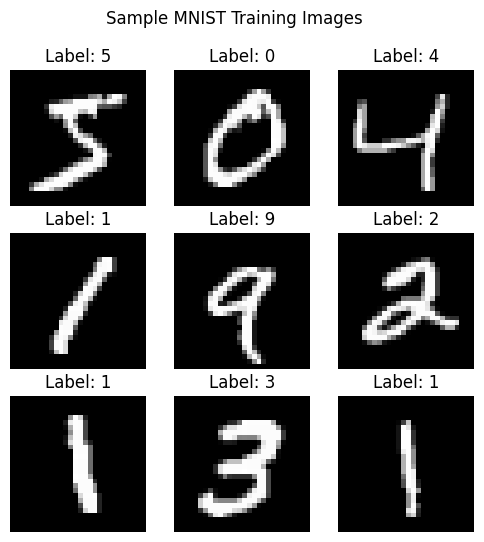

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [37]:
# Provided code: Load the MNIST dataset
print('Loading MNIST dataset...')
(X_train_img, y_train_img), (X_test_img, y_test_img) = mnist.load_data()

# Print shapes to validate
print('MNIST training data shape:', X_train_img.shape)
print('MNIST test data shape:', X_test_img.shape)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train_img[i], cmap='gray')
    plt.title(f"Label: {y_train_img[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Training Images')
plt.show()

X_train_img[1]

This dataset contains 28 by 28 pixel images of digits. In total, there are 70,000 images of handwritten digits. If you click on the `show data` button above, you will see the raw pixel data. Each digit is represented as a 28 by 28 matrix with grayscale pixel intensity. Notice that the range of pixel values is from 0 to 255.


### 2.2. Scale and Flatten the images for Logistic Regression.


This time, we will scale our image dataset using min-max normalization, not the z-score normalization provided by the `StandardScaler` method. This is because we already know that the range of our data will always be between 0 and 255, and it also demonstrates a different type of scaling.


In [49]:

X_train_img_scaled = X_train_img/255
X_test_img_scaled = X_test_img/255


### 2.3. Build a "*simple*" feedforward neural network using Keras

Now build a simple feedforward neural network using Keras. This network should have:
- A Flatten layer to convert the images to vectors.
- A Dense hidden layer with 50 neurons and ReLU activation.
- A Dense output layer with 10 neurons and softmax activation.



In [51]:
# Build a simple feedforward neural network using Keras
modelSD = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert images to 1D vector
    Dense(50, activation='relu'),   # Hidden layer with 50 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
modelSD.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (using 10% of the training data as validation set)
history = modelSD.fit(X_train_img_scaled, y_train_img, epochs=5, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8442 - loss: 0.5596 - val_accuracy: 0.9570 - val_loss: 0.1627
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9485 - loss: 0.1762 - val_accuracy: 0.9647 - val_loss: 0.1218
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9625 - loss: 0.1253 - val_accuracy: 0.9707 - val_loss: 0.1055
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9692 - loss: 0.1029 - val_accuracy: 0.9705 - val_loss: 0.1004
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0824 - val_accuracy: 0.9732 - val_loss: 0.0942


In [52]:
# Provided performance evaluation for Keras Neural Network on MNIST
train_loss_nnSD, train_acc_nnSD = modelSD.evaluate(X_train_img_scaled, y_train_img, verbose=0)
test_loss_nnSD, test_acc_nnSD = modelSD.evaluate(X_test_img_scaled, y_test_img, verbose=0)
print('Simple NN with Digits dataset - Training Accuracy:', train_acc_nnSD, '| Test Accuracy:', test_acc_nnSD)

Simple NN with Digits dataset - Training Accuracy: 0.9797999858856201 | Test Accuracy: 0.9700999855995178


**Approx. Expected output:**
```
Simple NN with Digits dataset - Training Accuracy: 0.9776666760444641 | Test Accuracy: 0.9686999917030334

```



### 2.4. Build a "*deeper*" feedforward neural network using Keras

Now build a deeper feedforward neural network using Keras. This network should have:
- A Flatten layer to convert the images to vectors.
- Three Dense hidden layers with 400, 300, and 200 neurons with ReLu activation, respectively.
- A Dense output layer with 10 neurons with softmax activation.


In [53]:
# Build a deeper feedforward neural network using Keras
modelDD = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert images to 1D vector
    Dense(400, activation='relu'),   # First hidden layer with 400 neurons
    Dense(300, activation='relu'),   # Second hidden layer with 300 neurons
    Dense(200, activation='relu'),   # Third hidden layer with 200 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
modelDD.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (using 10% of the training data as validation set)
history = modelDD.fit(X_train_img_scaled, y_train_img, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8905 - loss: 0.3523 - val_accuracy: 0.9675 - val_loss: 0.1061
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.0928 - val_accuracy: 0.9750 - val_loss: 0.0836
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0635 - val_accuracy: 0.9718 - val_loss: 0.0986
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9850 - loss: 0.0456 - val_accuracy: 0.9770 - val_loss: 0.0762
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0349 - val_accuracy: 0.9800 - val_loss: 0.0757


In [54]:
# Provided performance evaluation for Keras Neural Network on MNIST
train_loss_nnDD, train_acc_nnDD = modelDD.evaluate(X_train_img_scaled, y_train_img, verbose=0)
test_loss_nnDD, test_acc_nnDD = modelDD.evaluate(X_test_img_scaled, y_test_img, verbose=0)
print('Deeper NN with Digits dataset - Training Accuracy:', train_acc_nnDD, '| Test Accuracy:', test_acc_nnDD)

Deeper NN with Digits dataset - Training Accuracy: 0.9894166588783264 | Test Accuracy: 0.979200005531311


**Approx. Expected output:**
```
Deeper NN with Digits dataset - Training Accuracy: 0.9843000173568726 | Test Accuracy: 0.9739000201225281


```



### 2.5. Show the performance of our models in the MNIST fashion dataset

Now use the same neural network architecture as before, but with a more complex dataset to observe how the performance changes.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


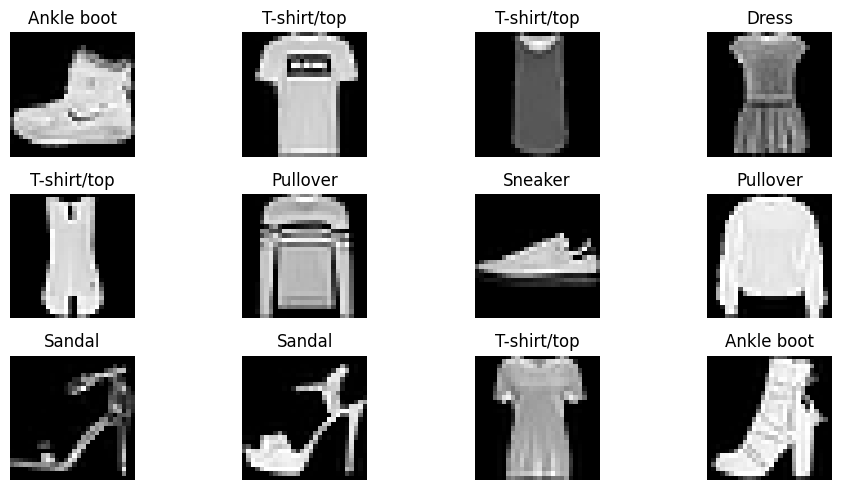

In [55]:
#Load & Split  dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#Scale dataset
X_train = X_train_full/ 255.
X_test = X_test / 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first 12 images
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(class_names[y_train_full[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

Lets train out NN

In [56]:

# Build a simple feedforward neural network using Keras
modelSF= Sequential([
    Flatten(input_shape=(28, 28)),  # Convert images to 1D vector
    Dense(50, activation='relu'),   # Hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
modelSF.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (using 10% of the training data as validation set)
history = modelSF.fit(X_train, y_train_full, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7682 - loss: 0.6823 - val_accuracy: 0.8483 - val_loss: 0.4223
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8565 - loss: 0.4078 - val_accuracy: 0.8540 - val_loss: 0.3983
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8687 - loss: 0.3645 - val_accuracy: 0.8710 - val_loss: 0.3626
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8786 - loss: 0.3409 - val_accuracy: 0.8597 - val_loss: 0.3758
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8843 - loss: 0.3198 - val_accuracy: 0.8758 - val_loss: 0.3473


In [57]:

train_loss_nnSF, train_acc_nnSF = modelSF.evaluate(X_train, y_train_full, verbose=0)
test_loss_nnSF, test_acc_nnSF = modelSF.evaluate(X_test, y_test, verbose=0)
print('Simple NN with Fashion dataset - Training Accuracy:', train_acc_nnSF, '| Test Accuracy:', test_acc_nnSF)

Simple NN with Fashion dataset - Training Accuracy: 0.889033317565918 | Test Accuracy: 0.8669999837875366


In [58]:

# Build a simple feedforward neural network using Keras
modelDF = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert images to 1D vector
    Dense(400, activation='relu'),   # Hidden layer
    Dense(300, activation='relu'),   # Hidden layer
    Dense(200, activation='relu'),   # Hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
modelDF.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (using 10% of the training data as validation set)
history = modelDF.fit(X_train, y_train_full, epochs=5, batch_size=32, validation_split=0.1)




Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7872 - loss: 0.5924 - val_accuracy: 0.8552 - val_loss: 0.3954
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8647 - loss: 0.3755 - val_accuracy: 0.8637 - val_loss: 0.3578
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8765 - loss: 0.3347 - val_accuracy: 0.8663 - val_loss: 0.3472
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8860 - loss: 0.3080 - val_accuracy: 0.8725 - val_loss: 0.3591
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8933 - loss: 0.2852 - val_accuracy: 0.8803 - val_loss: 0.3465


In [59]:
train_loss_nnDF, train_acc_nnDF = modelDF.evaluate(X_train, y_train_full, verbose=0)
test_loss_nnDF, test_acc_nnDF = modelDF.evaluate(X_test, y_test, verbose=0)
print('Deeper NN with Fashion dataset - Training Accuracy:', train_acc_nnDF, '| Test Accuracy:', test_acc_nnDF)

Deeper NN with Fashion dataset - Training Accuracy: 0.8954499959945679 | Test Accuracy: 0.8709999918937683


#### Lets compare our results

In [60]:
print('Simple NN with Digits dataset - Training Accuracy:', train_acc_nnSD, '| Test Accuracy:', test_acc_nnSD)
print('Deeper NN with Digits dataset - Training Accuracy:', train_acc_nnDD, '| Test Accuracy:', test_acc_nnDD)

print('Simple NN with Fashion dataset- Training Accuracy:', train_acc_nnSF, '| Test Accuracy:', test_acc_nnSF)
print('Deeper NN with Fashion dataset - Training Accuracy:', train_acc_nnDF, '| Test Accuracy:', test_acc_nnDF)

Simple NN with Digits dataset - Training Accuracy: 0.9797999858856201 | Test Accuracy: 0.9700999855995178
Deeper NN with Digits dataset - Training Accuracy: 0.9894166588783264 | Test Accuracy: 0.979200005531311
Simple NN with Fashion dataset- Training Accuracy: 0.889033317565918 | Test Accuracy: 0.8669999837875366
Deeper NN with Fashion dataset - Training Accuracy: 0.8954499959945679 | Test Accuracy: 0.8709999918937683


#### **Remember to explain the performance differences between the "simpler" and "deeper" neural network models, as well as between datasets**

Observe that the "deeper" models tend to perform better than the "simpler" ones. Why might this be the case? Additionally, note that performance drops when using the same neural network architecture with a more complex dataset. Be sure to discuss the potential reasons behind these differences.
